In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller

In [2]:
data = pd.read_csv(r'df_countries.csv', header=[0,1])

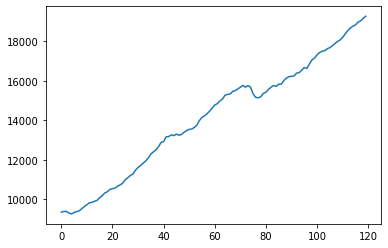

In [3]:
serie = data['United-States']['PIB']
serie.plot()

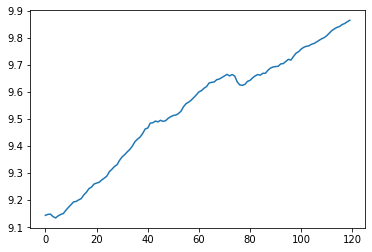

In [4]:
log_serie = np.log(data['United-States']['PIB'])
log_serie.plot()

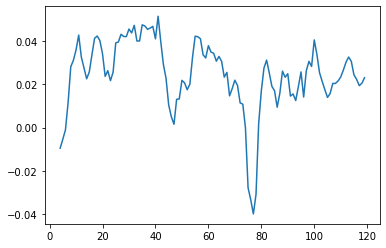

In [5]:
log_diff_serie = log_serie - log_serie.shift(4)
log_diff_serie = log_diff_serie.dropna()
log_diff_serie.plot()

In [6]:
#Préparation des fonctions
np.set_printoptions(suppress=True)

def kpss_test(serie1):    
    return(round(kpss(serie1)[1], 3))

def kpss_logdiff(serie1):
    serie2 = (np.log(serie1) - np.log(serie1).shift(4)).dropna()
    return(round(kpss_test(serie2), 3))

def adf_test(serie1, **kw):
    return(round(adfuller(serie1, **kw)[1], 3))

def adf_logdiff(serie1):
    serie2 = (np.log(serie1) - np.log(serie1).shift(4)).dropna()
    return(round(adf_test(serie2),3))

In [7]:
# Exemple avec la série temporelle du PIB des USA

serie1 = data['United-States']['PIB']
print('P-value pour le test KPSS de la série brute:', kpss_test(serie1))
print('P-value pour le test KPSS de la série log différenciée:', kpss_logdiff(serie1))

#KPSS H0, la série est stationnaire, donc on rejette à 5% la stationnarité si la p-value est <5%

print('P-value pour le test ADF de la série brute:', adf_test(serie1))
print('P-value pour le test ADF de la série log différenciée:', adf_logdiff(serie1))

#ADF H0, la série n'est pas stationnaire, donc si p-value < 5%, on rejette H0 et la série est stationnaire

P-value pour le test KPSS de la série brute: 0.01
P-value pour le test KPSS de la série log différenciée: 0.1
P-value pour le test ADF de la série brute: 0.956
P-value pour le test ADF de la série log différenciée: 0.24


C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [8]:
pays_ocde = {"Australia" :'AUS',"Austria":'AUT',"Belgium":'BEL',"Canada":'CAN',"Denmark":'DNK', "Germany" :'DEU', "Spain":'ESP',
             "Finland":'FIN',"France":'FRA',"Hungary":'HUN',"Ireland":'IRL', "Iceland": 'ISL', "Italy":'ITA', 'Korea': 'KOR',
             "Japan":'JPN',"Luxembourg":'LUX',"Norway":'NOR',"New-Zealand":'NZL',"Netherlands":'NLD',"Portugal":'PRT',
             "United Kingdom":'GBR',"Sweden":'SWE',"Switzerland":'CHE',"Slovak Republic":'SVK',"United-States":'USA'}

variables = ['Actifs', 'Chomage', 'Conso', 'Emplois', 'Exports', 'Formation', 'PIB']

In [9]:
pays = []
for x in pays_ocde.keys():
    pays.append(x)

In [10]:
# Tableau des p-value des test ADF sur les séries brutes (on s'attend à ne pas avoir beaucoup de séries stationnaires)

tabadf_brut = pd.DataFrame(index= variables, columns= pays)

for a in pays_ocde.keys(): 
    for b in variables: 
        serie1 = data[a][b]
        serie1.dropna(inplace=True)
        #print(adf_test(serie1))
        tabadf_brut[a][b] = adf_test(serie1)
tabadf_brut = tabadf_brut.T
tabadf_brut.style.applymap(lambda x: 'background-color : yellow' if x < 0.05 else '')

# Les valeurs en jaune correspondent aux p-value des séries stationnaires

C:\Users\adxva\anaconda3\lib\site-packages\pandas\core\series.py:4494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


,Actifs,Chomage,Conso,Emplois,Exports,Formation,PIB
Australia,1.000000,0.594000,0.942000,0.998000,0.998000,0.854000,0.999000
Austria,0.846000,0.156000,0.514000,0.926000,0.826000,0.963000,0.692000
Belgium,0.899000,0.143000,0.983000,0.951000,0.828000,0.927000,0.786000
Canada,0.988000,0.579000,0.998000,0.986000,0.311000,0.801000,0.965000
Denmark,0.869000,0.486000,0.906000,0.728000,0.884000,0.606000,0.956000
Germany,0.993000,0.868000,0.987000,0.999000,0.944000,0.955000,0.930000
Spain,0.102000,0.609000,0.321000,0.274000,0.835000,0.209000,0.514000
Finland,0.543000,0.045000,0.968000,0.374000,0.669000,0.931000,0.918000
France,0.687000,0.359000,0.930000,0.949000,0.867000,0.931000,0.834000
Hungary,0.995000,0.517000,0.737000,0.733000,0.968000,0.887000,0.977000


In [11]:
# On rempli le tableau avec les p-value du test ADF

tabadf = pd.DataFrame(index= variables, columns=pays)

for a in pays_ocde.keys(): 
    for b in variables: 
        serie1=data[a][b]
        serie1.dropna(inplace=True)
        
        p=adf_test(serie1)
       
        if p < 0.05:
            tabadf[a][b]=adf_test(serie1)
        else :
            tabadf[a][b]=adf_logdiff(serie1)
tabadf = tabadf.T

C:\Users\adxva\anaconda3\lib\site-packages\pandas\core\series.py:4494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


In [12]:
tabadf.style.applymap(lambda x: 'background-color : yellow' if x < 0.05 else '')

# Les valeurs en jaune correspondent aux p-value des séries stationnaires

,Actifs,Chomage,Conso,Emplois,Exports,Formation,PIB
Australia,0.075000,0.056000,0.521000,0.002000,0.243000,0.214000,0.522000
Austria,0.033000,0.039000,0.272000,0.005000,0.042000,0.004000,0.335000
Belgium,0.370000,0.386000,0.179000,0.012000,0.020000,0.212000,0.089000
Canada,0.334000,0.007000,0.056000,0.135000,0.143000,0.046000,0.030000
Denmark,0.046000,0.060000,0.144000,0.156000,0.095000,0.007000,0.448000
Germany,0.093000,0.238000,0.346000,0.168000,0.139000,0.010000,0.000000
Spain,0.515000,0.712000,0.630000,0.428000,0.148000,0.303000,0.218000
Finland,0.027000,0.045000,0.001000,0.193000,0.004000,0.001000,0.052000
France,0.249000,0.487000,0.118000,0.087000,0.165000,0.075000,0.109000
Hungary,0.624000,0.565000,0.605000,0.567000,0.115000,0.613000,0.544000


In [13]:
tabkpss_brut = pd.DataFrame(index= variables, columns=pays)

for a in pays_ocde.keys(): 
    for b in variables: 
        serie1=data[a][b]
        serie1.dropna(inplace=True)
        tabkpss_brut[a][b] = kpss_test(serie1)
tabkpss_brut = tabkpss_brut.T

'''
La p-value exacte n'est affichée que si elle est entre 0 et 0.1:
au dessus, on rejette H0 au seuil de 10% et donc on accepte la stationnarité de la série
'''

C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: Interpolatio

C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-va

"\nLa p-value exacte n'est affichée que si elle est entre 0 et 0.1:\nau dessus, on rejette H0 au seuil de 10% et donc on accepte la stationnarité de la série\n"

In [14]:
tabkpss_brut.style.applymap(lambda x: 'background-color : yellow' if x > 0.05 else '')
# Peu de séries brutes stationnaires en dehors du chômage

,Actifs,Chomage,Conso,Emplois,Exports,Formation,PIB
Australia,0.010000,0.017000,0.010000,0.010000,0.010000,0.010000,0.010000
Austria,0.010000,0.012000,0.010000,0.010000,0.010000,0.010000,0.010000
Belgium,0.011000,0.100000,0.010000,0.010000,0.010000,0.010000,0.010000
Canada,0.010000,0.018000,0.010000,0.010000,0.010000,0.010000,0.010000
Denmark,0.066000,0.100000,0.010000,0.070000,0.010000,0.017000,0.010000
Germany,0.010000,0.051000,0.010000,0.010000,0.010000,0.010000,0.010000
Spain,0.023000,0.098000,0.017000,0.100000,0.010000,0.100000,0.010000
Finland,0.010000,0.080000,0.010000,0.017000,0.010000,0.010000,0.010000
France,0.017000,0.093000,0.010000,0.017000,0.010000,0.010000,0.010000
Hungary,0.016000,0.100000,0.015000,0.046000,0.010000,0.014000,0.010000


In [15]:
tabkpss = pd.DataFrame(index= variables, columns=pays)

for a in pays_ocde.keys(): 
    for b in variables: 
        serie1=data[a][b]
        serie1.dropna(inplace=True)
        
        p=kpss_test(serie1)
       
        if p > 0.05:
            tabkpss[a][b]=kpss_test(serie1)
        else :
            tabkpss[a][b]=kpss_logdiff(serie1)
tabkpss = tabkpss.T

'''
La p-value exacte n'est affichée que si elle est entre 0 et 0.1:
au dessus, on rejette H0 au seuil de 10% et donc on accepte la stationnarité de la série
'''

C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-va

C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-va

C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
C:\Users\adxva\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-va

"\nLa p-value exacte n'est affichée que si elle est entre 0 et 0.1:\nau dessus, on rejette H0 au seuil de 10% et donc on accepte la stationnarité de la série\n"

In [16]:
tabkpss.style.applymap(lambda x: 'background-color : yellow' if x > 0.05 else '')
# quasi toutes les séries log différenciées sont stationnaires

,Actifs,Chomage,Conso,Emplois,Exports,Formation,PIB
Australia,0.086000,0.100000,0.100000,0.100000,0.086000,0.100000,0.100000
Austria,0.100000,0.100000,0.044000,0.100000,0.100000,0.100000,0.100000
Belgium,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
Canada,0.100000,0.100000,0.100000,0.100000,0.087000,0.100000,0.100000
Denmark,0.066000,0.100000,0.100000,0.070000,0.100000,0.100000,0.100000
Germany,0.100000,0.051000,0.100000,0.025000,0.100000,0.100000,0.100000
Spain,0.033000,0.098000,0.100000,0.100000,0.098000,0.100000,0.100000
Finland,0.100000,0.080000,0.100000,0.100000,0.098000,0.100000,0.100000
France,0.100000,0.093000,0.100000,0.100000,0.100000,0.100000,0.100000
Hungary,0.100000,0.100000,0.100000,0.100000,0.040000,0.100000,0.100000
